In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
df_wine = pd.read_csv('data/wine.csv')

# A. Wine Quality 

In [3]:
df_wine.type = df_wine.type.map({'white':0, 'red':1})

In [4]:
df_wine.quality_range.value_counts()

1    4113
0    2384
Name: quality_range, dtype: int64

In [5]:
X = df_wine.drop('quality_range', axis=1)
y = df_wine.quality_range

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

## 1. KNN'de Performansı Ölçme

# 1.1. score() metodu ile modeli değerlendirme

In [8]:
from sklearn.neighbors import KNeighborsClassifier 

In [9]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
y_train.head()

908     0
3131    0
2585    1
3375    1
4444    1
Name: quality_range, dtype: int64

In [11]:
knn.score(X_test, y_test)

0.7438461538461538

Modelimiz test verisinde %74'lik bir başarı yakaladı.

# 1.2. Çapraz Doğrulama

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
cvscores_3 = cross_val_score(knn, X_test, y_test, cv=3)
print('cv =  3 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_3))


# Perform 10-fold CV
cvscores_5 = cross_val_score(knn, X_test, y_test, cv=5)
print('cv = 5 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_5))


cvscores_10 = cross_val_score(knn, X_test, y_test, cv=10)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_10))


cvscores_15 = cross_val_score(knn, X_test, y_test, cv=15)
print('cv = 15 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_15))


cvscores_20 = cross_val_score(knn, X_test, y_test, cv=20)
print('cv = 20 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_20))

cvscores_30 = cross_val_score(knn, X_test, y_test, cv=30)
print('cv = 30 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_30))


cvscores_50 = cross_val_score(knn, X_test, y_test, cv=50)
print('cv = 50 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cvscores_50))

cv =  3 ---> Ortalama çarpraz doğrulama skoru :  0.6530652788568306
cv = 5 ---> Ortalama çarpraz doğrulama skoru :  0.6446074418488212
cv = 10 ---> Ortalama çarpraz doğrulama skoru :  0.6507527527800917
cv = 15 ---> Ortalama çarpraz doğrulama skoru :  0.6546404299611999
cv = 20 ---> Ortalama çarpraz doğrulama skoru :  0.6515268065268065
cv = 30 ---> Ortalama çarpraz doğrulama skoru :  0.6499077150239942
cv = 50 ---> Ortalama çarpraz doğrulama skoru :  0.6535384615384616


# 2.1. Mesafe ve Normalizasyon (StandardScaler())

Test noktamıza, diğer gözlemlerin ne kadar yakın olduğunun ölçülmesine dair konuştuk şu ana kadar. Kullandığımız ölçüm (L2) bütün birimlerin eşit olduğu varsayımını yapar. Böylece önceki örneğimizde, 1 birimlik gürültü şiddeti, bir sonrakinden eşit uzaklıkta.

Birimler genellikle eşittir. Değilse, eşitsizliğin uyarlamasının nasıl yapılacağını anlamak özel ve hassas bir konu. Eğer göreceli ölçekler birbirinden tamamen farklı ise bunu çözebilmek oldukça zor bir iş olacaktır. Örneğin, eğer binalarla ilgileniyorsanız ve elinizde kat yükseklikleri ve yüzey alanları varsa sadece yüzey alanları ile ilgilenen bir modeliniz olmalıdır çünkü bu boyuttaki ölçümlerde kat yüksekliğine göre çok daha fazla sayıda birim olacaktır.

Müzik örneğimize tekrar dönelim. Burada bir herhangi bir normalizasyon yapmadık. 400 sn. uzunluğundaki ve 35 ses şiddetindeki şarkıyı modelimiz jazz olarak tahmin etti. Bu ses şiddetinde herhangi bir rock şarkısı olmamasına rağmen eksenler arasındaki uyumsuzluktan dolayı modelimiz yanlış bir değerlendirmede bulundu.

Uyumlu olmayan bu ölçümlerin ele alınması gerekir. Veri biliminde buna normalizasyon denir. KNN‘de etkin şekilde kullanılan 2 normalizasyon metodu bulunmaktadır:

Verilerin sınırları 0 ila 1 arasında olacak şekilde her değişkeni bu sınırlar içinde tekrardan ölçeklendirirsiniz (-1 ila 1 arasında yapmak da makul olabilir). Bu şekilde her veri kendi sınıfındaki max. ve min noktalarına uzaklığı ile görülebilir. Eğer veriler lineer bir benzerlik gösteriyorsa bu en iyisi olabilir. Ayrıca veri setinin bilinen bir sınır içinde olduğunu bilmek iyi olacaktır.
Müzik örneğimizi birde normalizasyon yapılmış olarak inceleyeyelim. Bazı sınıflandırmanın farklı olduğunu görebilirsiniz.

ekrar kanser verilerine dönelim. Bu sefer normalizasyon yapalım ve modelimizi öyle oluşturalım. Bunun için ise Sci-learn kütüphanesinin .preprocessing modülünden StandardScaleri kullanabiliriz.

In [14]:
from sklearn.preprocessing import StandardScaler 

In [15]:
ss = StandardScaler() 
X_olcekli = ss.fit_transform(X) 

Şimdi verilerimizi ölçekledikten sonra tekrar eğitim ve test kümesi olarak ayırıp modelimizi oluşturabiliriz.

In [16]:
X_train_olcekli, X_test_olcekli, y_train, y_test = train_test_split(X_olcekli, y, test_size=0.2, random_state = 40)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_olcekli,y_train)
knn.score(X_test_olcekli, y_test)

0.7938461538461539

Ölçeklendirme sonrası modelimizin başarı yüzdesi %74'den %79'a çıktı. 

Diğer bir statndardizasyon yöntemi olarak da her gözlemin ortalamaya olan uzaklığını da hesaplayabilirsiniz. Standart sapma şeklinde gösterilebilir: genellikle z-score olarak bilinir. Z-score’u hesaplamak ve her noktanın ortalamaya uzaklığını hesaplamak sürekli veriler için çalışır.
Her iki teknik de çoğu durumda uygulanabilir. Bir önsezi ile hangisinin daha hassas olduğunu gözlemleyebilirsiniz.

# 2.2. Ağırlıklandırma (weights='distance')

Mesafeler hakkında konuşacağımız son konu ise ağırlıklandırmadır. KNN'nin sıradan versiyonunda,  
k sayıdaki bütün gözlemlerin test gözlemi çıktısına olan etkisi eşit olmalıdır. Eğer veriler yoğun olarak yerleştirilmişse bu, çok problem değildir.

Fakat bazı zamanlar en yakın k gözlemi, test noktasına göre uzaklıkları itibariyle benzer olmayabiliyor. Bu durumlarda mesafe ile ağırlıklandırma kullanışlı olabilir. İşlevsel olarak mesafenin tersi ile ağırlıklandırmak gerekir. Bu sayede en yakın noktalar (yakın mesafeler) diğerlerine göre ağırlıkta daha fazla etkiye sahip olacaktır.

Sklearn ile bunu uygulamak oldukça kolaydır. Modeli tanımlarken kullanabileceğiniz opsiyonel ağırlık parametresi vardır. Parametre olarak mesafeyi ayarlayın ve mesafe ağırlıklandırmasını kullanın.

Şimdi aşağıdaki örnek üzerinde çalışalım ve modelimize etkilerini gözlemleyelim. Bu örnekte SciPy kütüphanesinden statmodels modülünü kullanarak z-score verilerini elde edip kullanalım. Burada modeli tanımlarken komşu sayısı olarak 5, ağırlık olarak da distance değerini girelim.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

In [18]:
neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

Bu sefer veri çerçevemizi gerçek değerler yerine Z-score'ları ile dolduracağız.

In [19]:
X = pd.DataFrame({'alcohol'          :stats.zscore(df_wine.alcohol),
                  'fixed_acidity'    :stats.zscore(df_wine.fixed_acidity),
                  'volatile_acidity' :stats.zscore(df_wine.volatile_acidity),
                  'citric_acid'      :stats.zscore(df_wine.citric_acid),
                  'residual_sugar'   :stats.zscore(df_wine.residual_sugar),
                  'chlorides'        :stats.zscore(df_wine.chlorides),
                  'free_sulfur_dioxide' :stats.zscore(df_wine.free_sulfur_dioxide),
                  'total_sulfur_dioxide':stats.zscore(df_wine.total_sulfur_dioxide),
                  'density'          :stats.zscore(df_wine.density),
                  'pH'               :stats.zscore(df_wine.pH),
                  'sulphates'        :stats.zscore(df_wine.sulphates),
                  'type'             : stats.zscore(df_wine.type)})

In [20]:
X.head()

,alcohol,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,type
0,-1.420398,-0.167159,-0.431939,0.295141,2.567931,-0.377347,0.860316,0.967468,2.146664,-1.369904,-0.575460,-0.571367
1,-0.832456,-0.707427,-0.238754,0.154541,-0.827454,-0.218556,-0.963090,0.291092,-0.234264,0.515698,-0.282485,-0.571367
2,-0.328505,0.681835,-0.367544,0.576341,0.326106,-0.178858,-0.021977,-0.331885,0.139882,0.264285,-0.648703,-0.571367
3,-0.496489,-0.012796,-0.689517,0.013941,0.674351,0.138725,0.977955,1.252258,0.309948,-0.175689,-0.941678,-0.571367
4,-0.496489,-0.012796,-0.689517,0.013941,0.674351,0.138725,0.977955,1.252258,0.309948,-0.175689,-0.941678,-0.571367


In [21]:
X_zscore = stats.zscore(X)

X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.2, random_state = 40)

knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.8115384615384615

Burada da ayni formulun farkli yazimiyla daha yuksek bir sonuc aldik. 

Ağırlıklandırma işlemini farkli yazarak ayni veriyle yapalim.

In [22]:
X = df_wine.drop('quality_range', axis=1)
y = df_wine.quality_range

In [23]:
X_zscore = stats.zscore(X)

X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.2, random_state = 40)

knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7938461538461539

Burada da StandardScaler ile yaptığımız normalleştirme sonucunda aldığımız aynı değeri aldık.

# 3.3. K değerini belirlemek

KNN'in ince ayarlarındaki son önemli nokta  
k
 'yı seçmektir.  
k
 ‘yı seçme bir tercihtir.  
k
  yı daha da büyütmek sizin karar uzayınızı daha düzlemsel yapar. Tahminde daha fazla gözlemin etkisi olacaktır. Daha küçük  
k
 'lar ince oynaklıkları kaldıracaktır.

In [24]:
komsu_sayisi = np.arange(1, 9)
egitim_kumesi_skoru = np.empty(len(komsu_sayisi))
test_kumesi_skoru = np.empty(len(komsu_sayisi))

Bir döngü içerinde 1'den 8'a kadar komşu sayılarını değişerecek ve her bir komşu sayısı için .score() değerlerini alacağız.

In [25]:
for i, k in enumerate(komsu_sayisi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    egitim_kumesi_skoru[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_kumesi_skoru[i] = knn.score(X_test, y_test)

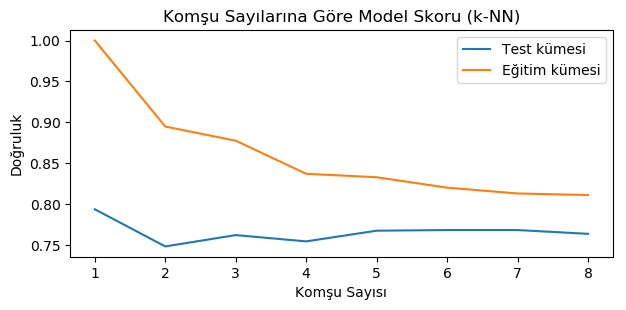

In [26]:
plt.figure(figsize=(7,3), dpi = 100)
plt.plot(komsu_sayisi, test_kumesi_skoru, label = 'Test kümesi')
plt.plot(komsu_sayisi, egitim_kumesi_skoru, label = 'Eğitim kümesi')
plt.legend()
plt.title('Komşu Sayılarına Göre Model Skoru (k-NN)')
plt.xlabel('Komşu Sayısı')
plt.ylabel('Doğruluk')
plt.show()

### 3. k-NN ile regresyon

KNN’yi regresyona çevirmek basit bir işlemdir. Daha önceki modelimizde, her bir  k gözlemi bir kategoriye atanmıştı. Regresyonda bunun yerine bir değere atanır. En popüler tepkiyi almak yerine, algoritma bütün oyların ortalamasını alır. Eğer ağırlıkları varsa, ağırlıklı ortalama alabilirsiniz.


k-NN regresyon algoritması için Scikit-learn kütüphanesinden neighbors modülünü ve buradan da KNeighborsRegressor modelini kullanacağız.

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
knn = KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df_wine.drop('quality_range', axis=1))
y = df_wine.quality_range
knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

In [29]:
X.max()

Unnamed: 0              6496.00000
type                       1.00000
fixed_acidity             15.90000
volatile_acidity           0.78000
citric_acid                0.74000
residual_sugar            17.20000
chlorides                  0.15200
free_sulfur_dioxide       81.00000
total_sulfur_dioxide     260.00000
density                    1.00315
pH                         3.69000
sulphates                  0.95000
alcohol                   13.80000
dtype: float64

In [30]:
len(y_train)

5197

# <Font color='purple'> HOCAM ARALIK 0 VE 1 ARASINDA OLDUGU ICIN SANIRIM BU CALISMADI, 3. DIMENSION BELIRLEYEMIYORUM

In [31]:
T = np.arange(0,6497,1)[:, np.newaxis]
y_tahmin = knn.predict(T)

ValueError: query data dimension must match training data dimension

# B. Life Expectancy

## <font color= 'red'> Butun degiskenlerle X denemesi:

In [32]:
df_life = pd.read_csv('data/life_expectancy.csv')

In [33]:
df_life.head(1)

,Unnamed: 0,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,...,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,name,region,sub-region
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,65.0,0.1,584.25921,16.6,6.9,0.479,10.1,Afghanistan,Asia,Southern Asia


In [34]:
df_life = pd.get_dummies(df_life)

In [35]:
X = df_life.drop('Life_Expectancy', axis=1) 
y = df_life.Life_Expectancy

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

## 1. KNN'de Performansı Ölçme

# 1.1. score() metodu ile modeli değerlendirme

In [38]:
from sklearn.neighbors import KNeighborsClassifier 

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

In [40]:
y_train.head()

1328    64.4
2255    81.7
315     65.1
1237    81.8
1197    71.8
Name: Life_Expectancy, dtype: float64

In [41]:
from sklearn import utils

print(utils.multiclass.type_of_target(y_train))

continuous


In [42]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
encoded = le.fit_transform(y_train)

In [43]:
encoded

array([178, 336, 185, ..., 255, 275, 288], dtype=int64)

In [44]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [45]:
y_train = le.fit_transform(y_train)

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [47]:
print(utils.multiclass.type_of_target(y_test))

continuous


In [48]:
print(utils.multiclass.type_of_target(X_test))

continuous-multioutput


In [49]:
y_test = le.fit_transform(y_test)

In [50]:
knn.score(X_test,y_test)

0.0035335689045936395

## <font color= 'red'> Yeni bir X ile yeniden deneme:

In [83]:
df_life = pd.read_csv('data/LifeExpectancy.csv', index_col=0)

In [84]:
df_life.head()

,Unnamed: 0,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,16.6,6.9,0.479,10.1
1,1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,16.6,6.9,0.476,10.0
2,2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,16.6,6.9,0.470,9.9
3,3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,16.6,6.9,0.463,9.8
4,4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,16.6,6.9,0.454,9.5


In [85]:
#corr_matrix = df_life.corr()

In [86]:
#corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending= False)[1:13]

In [87]:
X = df_life.drop('Life_Expectancy', axis=1)
y = df_life.Life_Expectancy 

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

# <font color= 'purple'> HOCAM BURDA CORR_LIST I SILDIM + INDEX LERI EKLEYIP CIKARIP DENEDIM 
    
#   <font color= 'purple'> ASAGIDAKI ISLEMLERI not in index KEY ERROR YUZUNDEN DENEDIM. OLMADI SONRAKI SATIRDA DA YAZDIM 

In [91]:
df_life.columns = df_life.columns.to_series().apply(lambda x: x.strip())

In [92]:
len(df_life.reset_index())

2826

In [93]:
df_life.reset_index().head()

,index,Unnamed: 0,Year,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
0,0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,...,83,6.0,8.16,65.0,0.1,584.259210,16.6,6.9,0.479,10.1
1,1,1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,...,86,58.0,8.18,62.0,0.1,612.696514,16.6,6.9,0.476,10.0
2,2,2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,...,89,62.0,8.13,64.0,0.1,631.744976,16.6,6.9,0.470,9.9
3,3,3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,...,93,67.0,8.52,67.0,0.1,669.959000,16.6,6.9,0.463,9.8
4,4,4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,...,97,68.0,7.87,68.0,0.1,63.537231,16.6,6.9,0.454,9.5


In [94]:
X = df_life.drop('Life_Expectancy', axis=1)
y = df_life.Life_Expectancy

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'

# <font color= 'purple'>  YINE AYNI HATA GELINCE BENDE ENCODE YAPTIM AMA ARTIK O DA CALISMIYOR

In [98]:
y_train = le.fit_transform(y_train)

In [99]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [103]:
X_test.head()

,Unnamed: 0,Year,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
2596,2596,2004,132.0,33,1.35,1.132767,77.0,8927,56.8,39,85.0,5.37,85.0,0.1,64.729530,5.1,4.9,0.675,12.0
604,604,2003,271.0,2,0.26,45.090108,28.0,0,18.4,2,8.0,3.65,8.0,0.1,544.566526,7.6,6.9,0.000,9.2
2809,2809,2000,498.0,44,2.62,45.616880,82.0,30509,16.8,72,85.0,7.16,85.0,12.7,341.955625,7.5,6.9,0.418,9.6
628,628,2012,97.0,1,3.34,2568.237059,91.0,0,57.5,1,9.0,9.56,91.0,0.1,2819.649531,1.8,1.7,0.758,13.6
2233,2233,2015,413.0,22,0.01,0.000000,86.0,607,24.4,30,86.0,11.90,86.0,0.5,587.538233,7.4,6.9,0.431,9.5


In [100]:
X_test = le.fit_transform(X_test)

ValueError: bad input shape (566, 19)

In [101]:
knn.score(X_test,y_test)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

# <font color = 'purple'> ValueError: Classification metrics can't handle a mix of continuous and multiclass targets HATASI GELINCE BENDE X_TEST I ENCODE YAPAYIM DEDIM ONCEKI ISLEMDEKI GIBI AMA BU SEFER O DA OLMADI VE  ValueError: bad input shape (566, 11) HATASI VERDI

In [102]:
X_test = le.fit_transform(X_test)

ValueError: bad input shape (566, 19)

# 1.2. Çapraz Doğrulama